In [ ]:

import numpy as np
import random as rn 
import pandas as pd
import seaborn as sns


In [6]:
iris=pd.read_csv('iris.csv')

In [7]:
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [8]:
list(iris.columns)


['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [9]:
iris.iloc[0] #iloc -> wiersze #iris.iloc[0][0]?


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

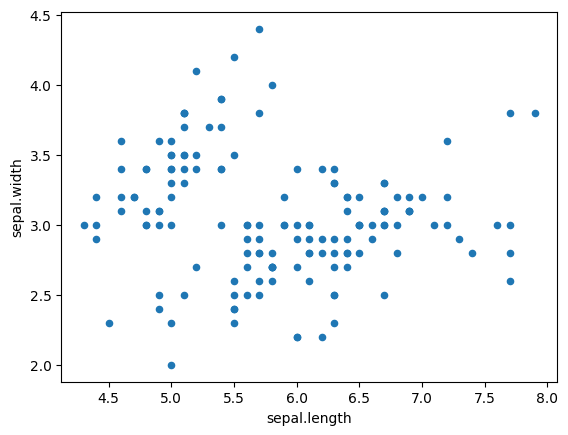

In [10]:
iris.plot(kind="scatter",x='sepal.length',y='sepal.width')


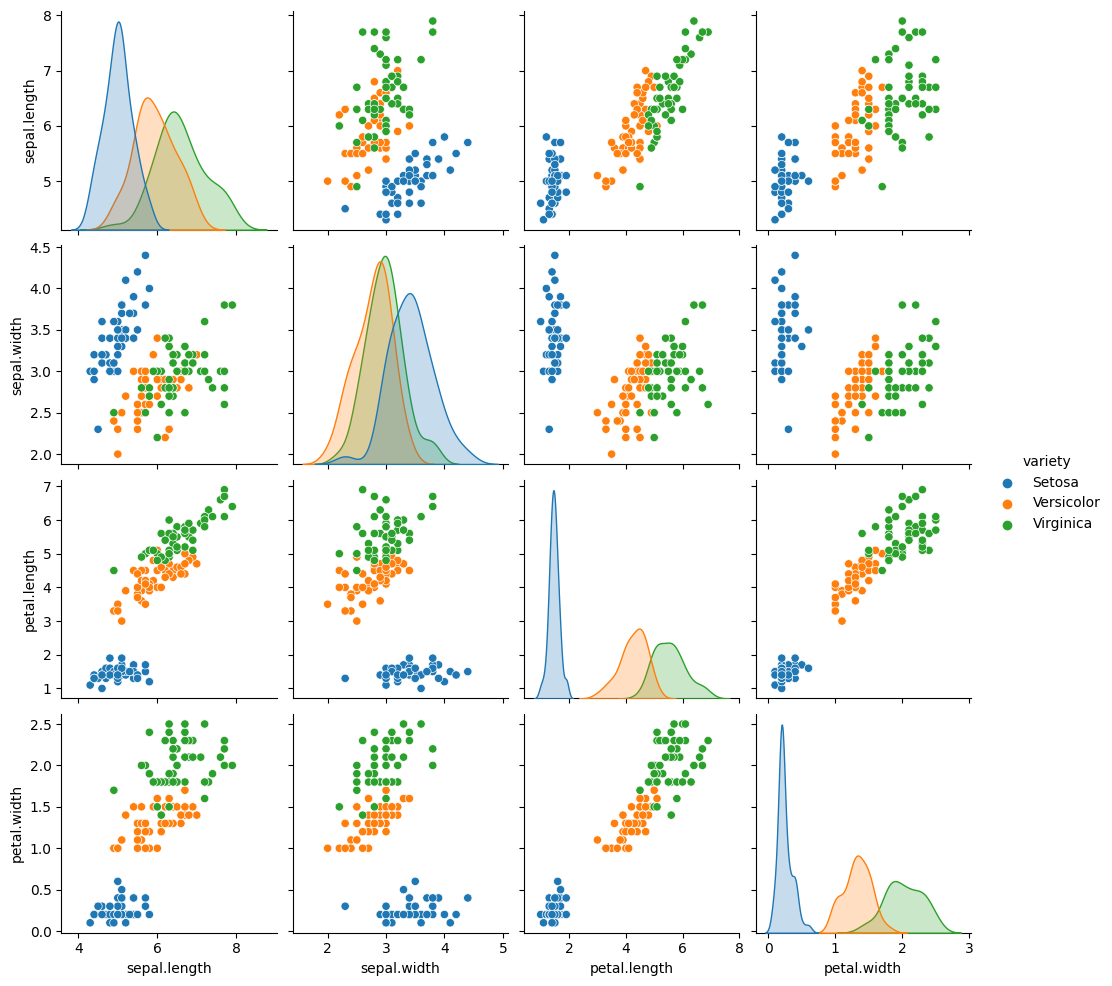

In [11]:
sns.pairplot(iris,hue="variety")

In [23]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j=rn.randint(0,i-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    @staticmethod
    def normalization(x):
        #x' = (x-min)/(max-min)
        values = x.select_dtypes(exclude="object") #kopia zbioru x bez nazw kwiatów
        columnNames=values.columns.tolist() #nazwy kolumn z atrybutami
        for column in columnNames:
            data = x.loc[:,column] #wszystkie rekordy z jednej z kolumn
            max1=max(data)
            min1=min(data)
            for row in range(0, len(x),1):
                xprim=(x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim


    @staticmethod
    def split(x,k): #k=0.7 -> 70% do zbioru treningowego, 30% testowy
        split_index=int(k*len(x))
        df1 = x.iloc[:split_index,:] #divide dataframe by rows
        df2 = x.iloc[split_index:,:]
        
        return df1, df2

In [24]:
DataProcessing.shuffle(iris)
iris.head()

trainingSet, validatingSet = DataProcessing.split(iris,0.7)


InvalidIndexError: (slice(None, 105, None), slice(None, None, None))

In [ ]:
trainingSet=DataProcessing.normalization(trainingSet)
trainingSet.head()

AttributeError: 'NoneType' object has no attribute 'head'